In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_sample = pd.read_csv("../data/accepted_2007_to_2018Q4.csv", low_memory=False, nrows=5000)
df_sample.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_sample.info()
df_sample.describe()
df_sample.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 5.8+ MB


sec_app_fico_range_low                        5000
sec_app_inq_last_6mths                        5000
sec_app_open_act_il                           5000
sec_app_collections_12_mths_ex_med            5000
sec_app_mths_since_last_major_derog           5000
sec_app_revol_util                            5000
sec_app_open_acc                              5000
sec_app_chargeoff_within_12_mths              5000
sec_app_mort_acc                              5000
sec_app_num_rev_accts                         5000
revol_bal_joint                               5000
member_id                                     5000
sec_app_fico_range_high                       5000
sec_app_earliest_cr_line                      5000
desc                                          4999
verification_status_joint                     4971
dti_joint                                     4971
annual_inc_joint                              4971
orig_projected_additional_accrued_interest    4966
deferral_term                  

In [7]:
df_sample['loan_status'].value_counts()

loan_status
Fully Paid            3637
Charged Off            816
Current                514
Late (31-120 days)      29
In Grace Period          3
Late (16-30 days)        1
Name: count, dtype: int64

In [9]:
# Mark 'Fully Paid' as 0 and 'Charged Off' as 1, ignore the rest
df_model = df_sample[df_sample['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()
df_model['loan_status_binary'] = df_model['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})


In [11]:
features = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
    'home_ownership', 'annual_inc', 'purpose', 'dti'
]

df_model = df_model[features + ['loan_status_binary']]

In [13]:
df_model = pd.get_dummies(df_model, drop_first=True)
df_model = df_model.dropna()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
X = df_model.drop('loan_status_binary', axis=1)
y = df_model['loan_status_binary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       719
           1       0.46      0.13      0.21       172

    accuracy                           0.80       891
   macro avg       0.64      0.55      0.55       891
weighted avg       0.75      0.80      0.76       891



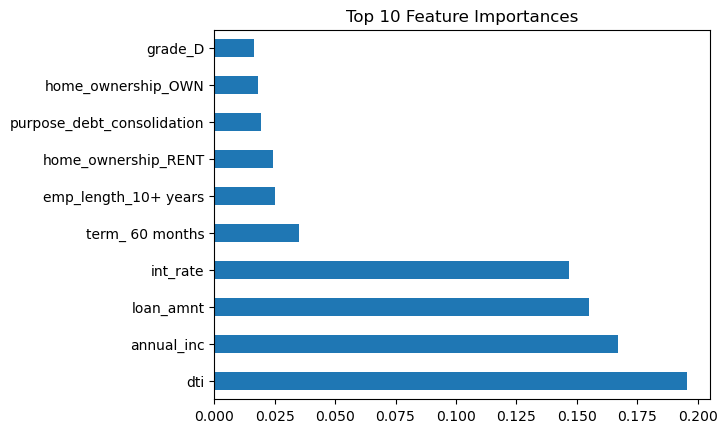

In [25]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [27]:
df_sample['loan_status'].value_counts()

loan_status
Fully Paid            3637
Charged Off            816
Current                514
Late (31-120 days)      29
In Grace Period          3
Late (16-30 days)        1
Name: count, dtype: int64